Bush book page 84 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# PARAMETERS
epsilon = 0.1
t0 = 0
tN = 5


In [35]:
#system of first order equations
def system(t, u):
    u1, u2 = u
    du1_dt = u2
    du2_dt = -u1 + epsilon * u1 * u2**2
    return [du1_dt, du2_dt]

# Initial conditions
u1_0 = 1  # u(0) = 1
u2_0 = 0  # du/dt(0) = 0
y0 = [u1_0, u2_0]
ts = np.linspace(t0, tN, 1000)  
# solve
sol = solve_ivp(system, (t0, tN), y0, t_eval=ts, method='RK45')
ts_numerical = sol.t
us_numerical = sol.y[0]

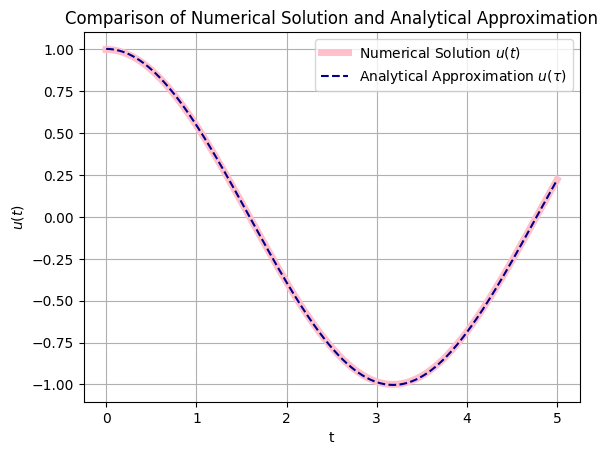

In [36]:
omega = 1 - epsilon / 8  # function to adjust frequency

# analytical approximation
def Lindstedt_Poincare(t):
    tau = omega * t  
    u = np.cos(tau) + epsilon*(1/32) * np.cos(3*tau)
    return u
us_approx = Lindstedt_Poincare(ts_numerical)

# Plotting for both
plt.plot(ts_numerical, us_numerical, label='Numerical Solution $u(t)$', color='pink', linewidth = 5)
plt.plot(ts_numerical, us_approx, label='Analytical Approximation $u(\\tau)$', linestyle='--', color='darkblue')
plt.xlabel("t")
plt.ylabel('$u(t)$')
plt.title('Comparison of Numerical Solution and Analytical Approximation')
plt.legend()
plt.grid(True)
plt.show()
